<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Seasonal Arima Models
---

## Learning Objectives
---

### Core

- Plot the decomposition of a timeseries into the components of
    - trend 
    - seasonal pattern
    - residuals
- Perform seasonal differencing on data
- Examine the use of SARIMAX state-space modeling for advanced timeseries forecasting

### Target
- Produce a diagnostic plot of the residuals


<h1>Lesson Guide<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Learning-Objectives" data-toc-modified-id="Learning-Objectives-1">Learning Objectives</a></span><ul class="toc-item"><li><span><a href="#Core" data-toc-modified-id="Core-1.1">Core</a></span></li><li><span><a href="#Target" data-toc-modified-id="Target-1.2">Target</a></span></li></ul></li><li><span><a href="#Statsmodels-timeseries-tools" data-toc-modified-id="Statsmodels-timeseries-tools-2">Statsmodels timeseries tools</a></span></li><li><span><a href="#Bus-ridership-data" data-toc-modified-id="Bus-ridership-data-3">Bus ridership data</a></span><ul class="toc-item"><li><span><a href="#Clean-the-data" data-toc-modified-id="Clean-the-data-3.1">Clean the data</a></span></li><li><span><a href="#Create-a-date-index-for-the-data" data-toc-modified-id="Create-a-date-index-for-the-data-3.2">Create a date index for the data</a></span></li></ul></li><li><span><a href="#Plot-the-riders-across-months" data-toc-modified-id="Plot-the-riders-across-months-4">Plot the riders across months</a></span></li><li><span><a href="#Decompose-the-timeseries-and-plot" data-toc-modified-id="Decompose-the-timeseries-and-plot-5">Decompose the timeseries and plot</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Plot-just-the-seasonal-component" data-toc-modified-id="Plot-just-the-seasonal-component-5.0.1">Plot just the seasonal component</a></span></li></ul></li></ul></li><li><span><a href="#Seasonal-ARIMA-(SARIMAX)" data-toc-modified-id="Seasonal-ARIMA-(SARIMAX)-6">Seasonal ARIMA (SARIMAX)</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Ordinary-differencing" data-toc-modified-id="Ordinary-differencing-6.0.1">Ordinary differencing</a></span></li><li><span><a href="#Seasonal-differencing" data-toc-modified-id="Seasonal-differencing-6.0.2">Seasonal differencing</a></span></li><li><span><a href="#Mixtures-of-seasonal-and-ordinary-differencing" data-toc-modified-id="Mixtures-of-seasonal-and-ordinary-differencing-6.0.3">Mixtures of seasonal and ordinary differencing</a></span></li><li><span><a href="#SARIMAX" data-toc-modified-id="SARIMAX-6.0.4">SARIMAX</a></span></li><li><span><a href="#Plot-the-ACF-and-PACF-of-the-residuals" data-toc-modified-id="Plot-the-ACF-and-PACF-of-the-residuals-6.0.5">Plot the ACF and PACF of the residuals</a></span></li></ul></li><li><span><a href="#Forecast-using-the-SARIMAX-model" data-toc-modified-id="Forecast-using-the-SARIMAX-model-6.1">Forecast using the SARIMAX model</a></span></li><li><span><a href="#Force-coefficients-to-zero" data-toc-modified-id="Force-coefficients-to-zero-6.2">Force coefficients to zero</a></span></li></ul></li><li><span><a href="#Visualizing-the-time-series" data-toc-modified-id="Visualizing-the-time-series-7">Visualizing the time series</a></span><ul class="toc-item"><li><span><a href="#Visualize-the-original-timeseries" data-toc-modified-id="Visualize-the-original-timeseries-7.1">Visualize the original timeseries</a></span></li><li><span><a href="#Visualize-the-first-differenced-timeseries" data-toc-modified-id="Visualize-the-first-differenced-timeseries-7.2">Visualize the first-differenced timeseries</a></span></li><li><span><a href="#Visualize-the-second-differenced-timeseries" data-toc-modified-id="Visualize-the-second-differenced-timeseries-7.3">Visualize the second-differenced timeseries</a></span></li><li><span><a href="#Visualize-seasonally-differenced-timeseries" data-toc-modified-id="Visualize-seasonally-differenced-timeseries-7.4">Visualize <em>seasonally</em>-differenced timeseries</a></span></li><li><span><a href="#Visualize-the-first-differenced-seasonally-differenced-timeseries" data-toc-modified-id="Visualize-the-first-differenced-seasonally-differenced-timeseries-7.5">Visualize the first differenced seasonally differenced timeseries</a></span></li><li><span><a href="#Visualize-the-second-differenced-seasonally-differenced-timeseries" data-toc-modified-id="Visualize-the-second-differenced-seasonally-differenced-timeseries-7.6">Visualize the second differenced seasonally differenced timeseries</a></span></li></ul></li><li><span><a href="#Load-additional-data" data-toc-modified-id="Load-additional-data-8">Load additional data</a></span></li><li><span><a href="#Additional-resources" data-toc-modified-id="Additional-resources-9">Additional resources</a></span></li></ul></div>

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set(font_scale=1.5)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

## Statsmodels timeseries tools
---

Statsmodels, has a wide variety of reliable timeseries analysis tools. We will start off by loading the autocorrelation and partial autocorrelation functions, as well as a function to decompose timeseries.

In [3]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Bus ridership data
---

We are going to play around with some Portland, OR bus data. Load in the bus data below and check it out.

### Clean the data

In [4]:
# data https://datamarket.com/data/set/22w6/portland-oregon-average-monthly-bus-ridership-100-january-1973-through-june-1982-n114#!ds=22w6&display=line
bus = pd.read_csv(
    '../../../../resource-datasets/portland_bus_riders/portland-oregon-average-monthly.csv', index_col=0)
bus.index.name = None
bus.reset_index(inplace=True)
bus.head()

,index,"Portland Oregon average monthly bus ridership (/100) January 1973 through June 1982, n=114"
0,1960-01,648
1,1960-02,646
2,1960-03,639
3,1960-04,654
4,1960-05,630


In [5]:
bus.iloc[115]['index']

'Portland Oregon average monthly bus ridership (/100) January 1973 through June 1982'

In [6]:
bus.tail()

,index,"Portland Oregon average monthly bus ridership (/100) January 1973 through June 1982, n=114"
111,1969-04,1432
112,1969-05,1394
113,1969-06,1327
114,NaN,NaN
115,Portland Oregon average monthly bus ridership ...,n=114


There are a couple of bad rows. Get rid of them.

In [7]:
bus.drop([114, 115], inplace=True, axis=0)

Rename the columns and make the riders column an integer:

In [8]:
bus.columns = ['date', 'riders']

bus['riders'] = bus.riders.apply(lambda x: int(x))
bus.riders.head()

0    648
1    646
2    639
3    654
4    630
Name: riders, dtype: int64

### Create a date index for the data

In [9]:
bus.index = pd.date_range(start='01/01/1973', end='30/06/1982', freq='M')
bus.drop(['date'], axis=1, inplace=True)

In [10]:
print(len(bus.index))

114


In [11]:
bus.head()

,riders
1973-01-31,648
1973-02-28,646
1973-03-31,639
1973-04-30,654
1973-05-31,630


In [12]:
bus['riders'] = bus.riders / \
    bus.index.map(lambda x: pd.Period(x, freq='M').daysinmonth)

In [13]:
bus.head()

,riders
1973-01-31,20.903226
1973-02-28,23.071429
1973-03-31,20.612903
1973-04-30,21.800000
1973-05-31,20.322581


## Plot the riders across months
---

We can look at the raw ridership data first.

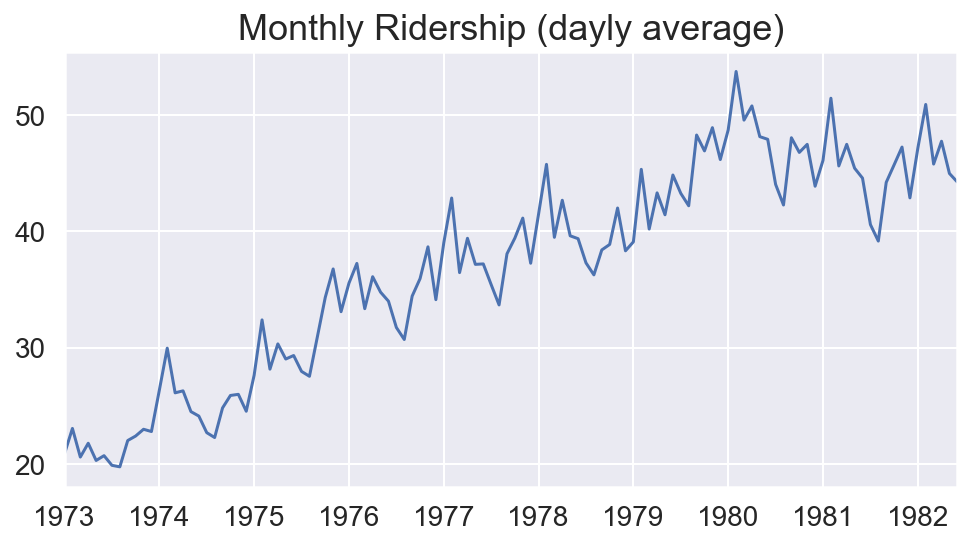

In [14]:
bus.riders.plot(
    figsize=(8, 4), title='Monthly Ridership (dayly average)', fontsize=14)
plt.show()

## Decompose the timeseries and plot
---

Using the `seasonal_decompose` function, we can break the timeseries into its constituent parts.

Use the function on the riders data with a frequency of 12, then plot the data.

> **Hint:** The decomposition object from `seasonal_decompose` has a `.plot` function like for pandas dataframes

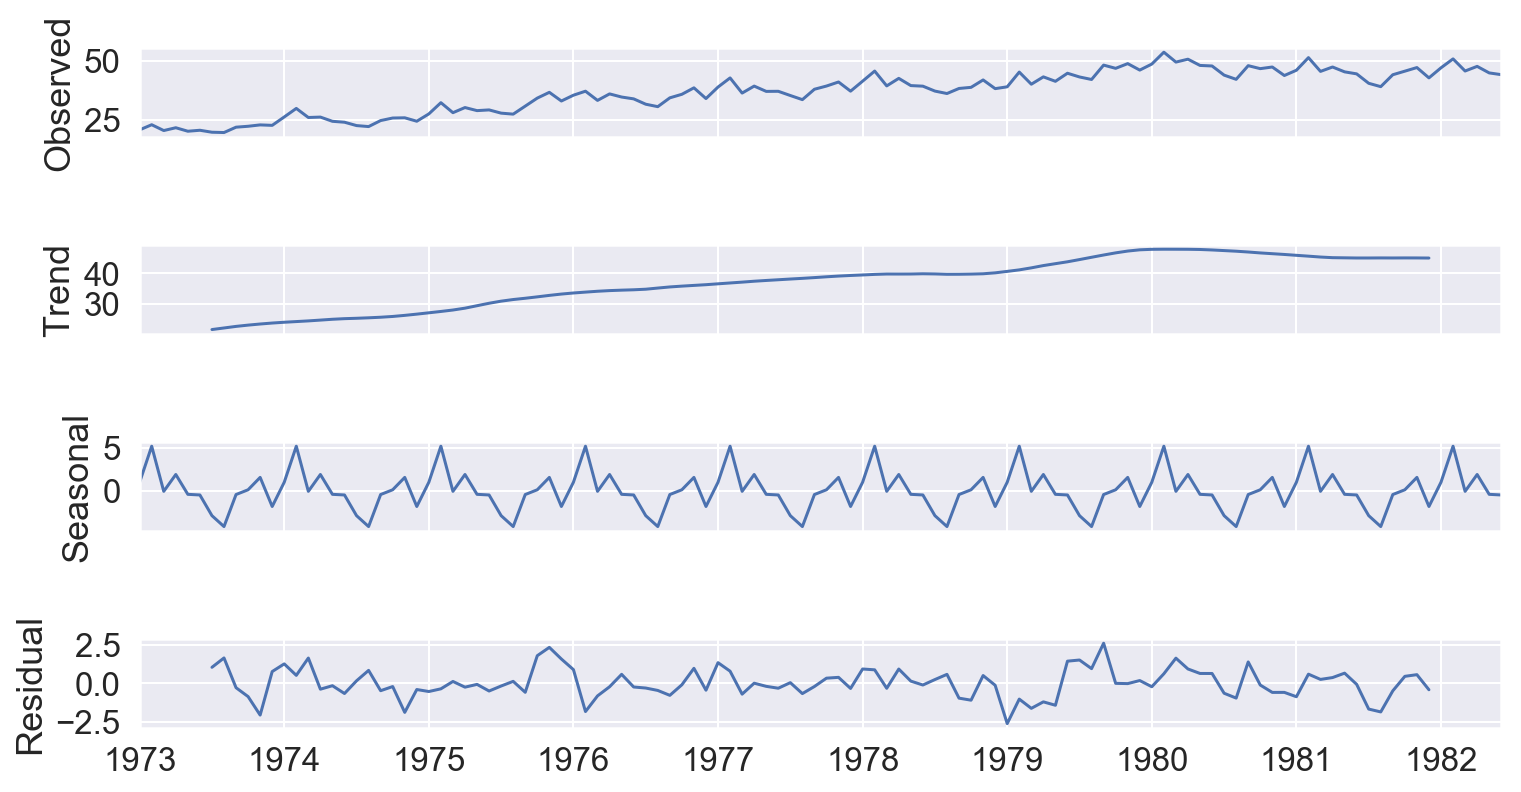

In [15]:
decomposition = seasonal_decompose(bus.riders, freq=12)
fig = decomposition.plot()
fig.set_size_inches(12, 6)
plt.show()

#### Plot just the seasonal component

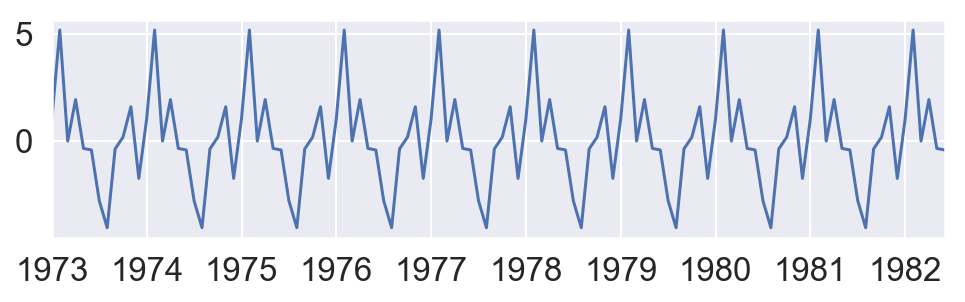

In [16]:
# grab just one graphic doing the following:
decomposition.seasonal.plot(figsize=(8, 2))
plt.show()

## Seasonal ARIMA (SARIMAX)
---

Apparently we have a strong trend component which leads to a long time of fairly linear increase leveling off at later times. Additionally we do have some periodic pattern even though this is much less pronounced than the trend component.

The trend component implies that we will have to take some differencing step to reach stationarity.

An annual seasonal effect means that it would be good to include information from lags one or two years preceding in our ARIMA model. We could easily do that by modeling on all lags up to two years ago - ultimately ending up with a model that includes more than twenty parameters even though we have little more than 100 observations.

SARIMA models try to include this information in a more economic way by modeling on the lags at seasonal distance, but not on those in between. In this way we can keep the number of coefficients low.

We are going to use the statsmodels [SARIMAX model](http://www.statsmodels.org/dev/generated/statsmodels.tsa.statespace.sarimax.SARIMAX.html) which is an advanced state space model that allows us to build a Seasonal ARIMA model and also to take into account the effects of other predictors.

The granular details of SARIMAX are beyond the scope of this walkthrough, but we can build a model and use it to forecast as an example of the powerful timeseries analysis capabilities that statsmodels contains.

SARIMAX has the possibility to include certain lags into our model and forcing the coefficients of others to zero. For this reason, this implementation is also an enhanced version for fitting non-seasonal ARIMA models.

SARIMA models are indicated as being of the form

$$(p,d,q)\times(p_S,d_S,q_S,S)$$

The first triple indicates the usual ARIMA model. The second set of numbers indicates on how many lags of observations and noise terms at lag distance $S$ one models and how many seasonal differencing steps are taken.

Let's first clarify the role of the differencing steps. As before, they serve to obtain stationarity.

#### Ordinary differencing

That is what we used before.

In [17]:
# first difference, d=1, d_S=0
bus['first_difference'] = bus.riders.diff()
# second difference, d=2, d_S=0
bus['second_difference'] = bus.riders.diff().diff()

In [18]:
bus.riders.diff().diff().head()

1973-01-31         NaN
1973-02-28         NaN
1973-03-31   -4.626728
1973-04-30    3.645622
1973-05-31   -2.664516
Freq: M, Name: riders, dtype: float64

In [19]:
bus.riders.diff(2).head()

1973-01-31         NaN
1973-02-28         NaN
1973-03-31   -0.290323
1973-04-30   -1.271429
1973-05-31   -0.290323
Freq: M, Name: riders, dtype: float64

#### Seasonal differencing

We can now model on a seasonally differenced time series.

In [20]:
# seasonal difference, d=0, d_S=1
bus['seasonal_difference'] = bus.riders - bus.riders.shift(12)

#### Mixtures of seasonal and ordinary differencing

We can mix both. The order does not matter.

In [21]:
# first and seasonal difference, d=1, d_S=1
bus['seasonal_first_difference'] = (
    bus.riders.diff() - bus.riders.diff().shift(12))
# seasonal and first difference, d=1, d_S=1
bus['seasonal_first_difference'] = (bus.riders - bus.riders.shift(12)).diff()
# seasonal and second difference , d=2, d_S=1
bus['seasonal_second_difference'] = (
    bus.riders - bus.riders.shift(12)).diff().diff()

#### SARIMAX

Let's fit a particular combination.

In [22]:
data = bus.riders
model = sm.tsa.statespace.SARIMAX(data,
                                  order=(2, 1, 0),
                                  seasonal_order=(1, 1, 1, 12))
results = model.fit(maxiter=10000)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                             riders   No. Observations:                  114
Model:             SARIMAX(2, 1, 0)x(1, 1, 1, 12)   Log Likelihood                -165.721
Date:                            Fri, 14 Feb 2020   AIC                            341.441
Time:                                    12:32:03   BIC                            354.517
Sample:                                01-31-1973   HQIC                           346.735
                                     - 06-30-1982                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1044      0.094     -1.114      0.265      -0.288       0.079
ar.L2         -0.0334      0.107     -0.312      0.755      -0.243       0.177
ar.S.L12       0.2928      0.224      1.307      0.191      -0.146       0.732
ma.S.L12      -0.7707      0.232     -3.322      0.001      -1.225      -0.316
sigma2         1.4729      0.210      6.997      0.000       1.060       1.885
===================================================================================
Ljung-Box (Q):                       36.63   Jarque-Bera (JB):                 4.36
Prob(Q):                              0.62   Prob(JB):                         0.11
Heteroskedasticity (H):               1.17   Skew:                             0.40
Prob(H) (two-sided):                  0.65   Kurtosis:                         3.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Plot the ACF and PACF of the residuals

The SARIMA object includes the residual plots that we had to create by hand for the ARIMA model.

What should we be expecting from the ACF and PACF of our residuals if the model is good?

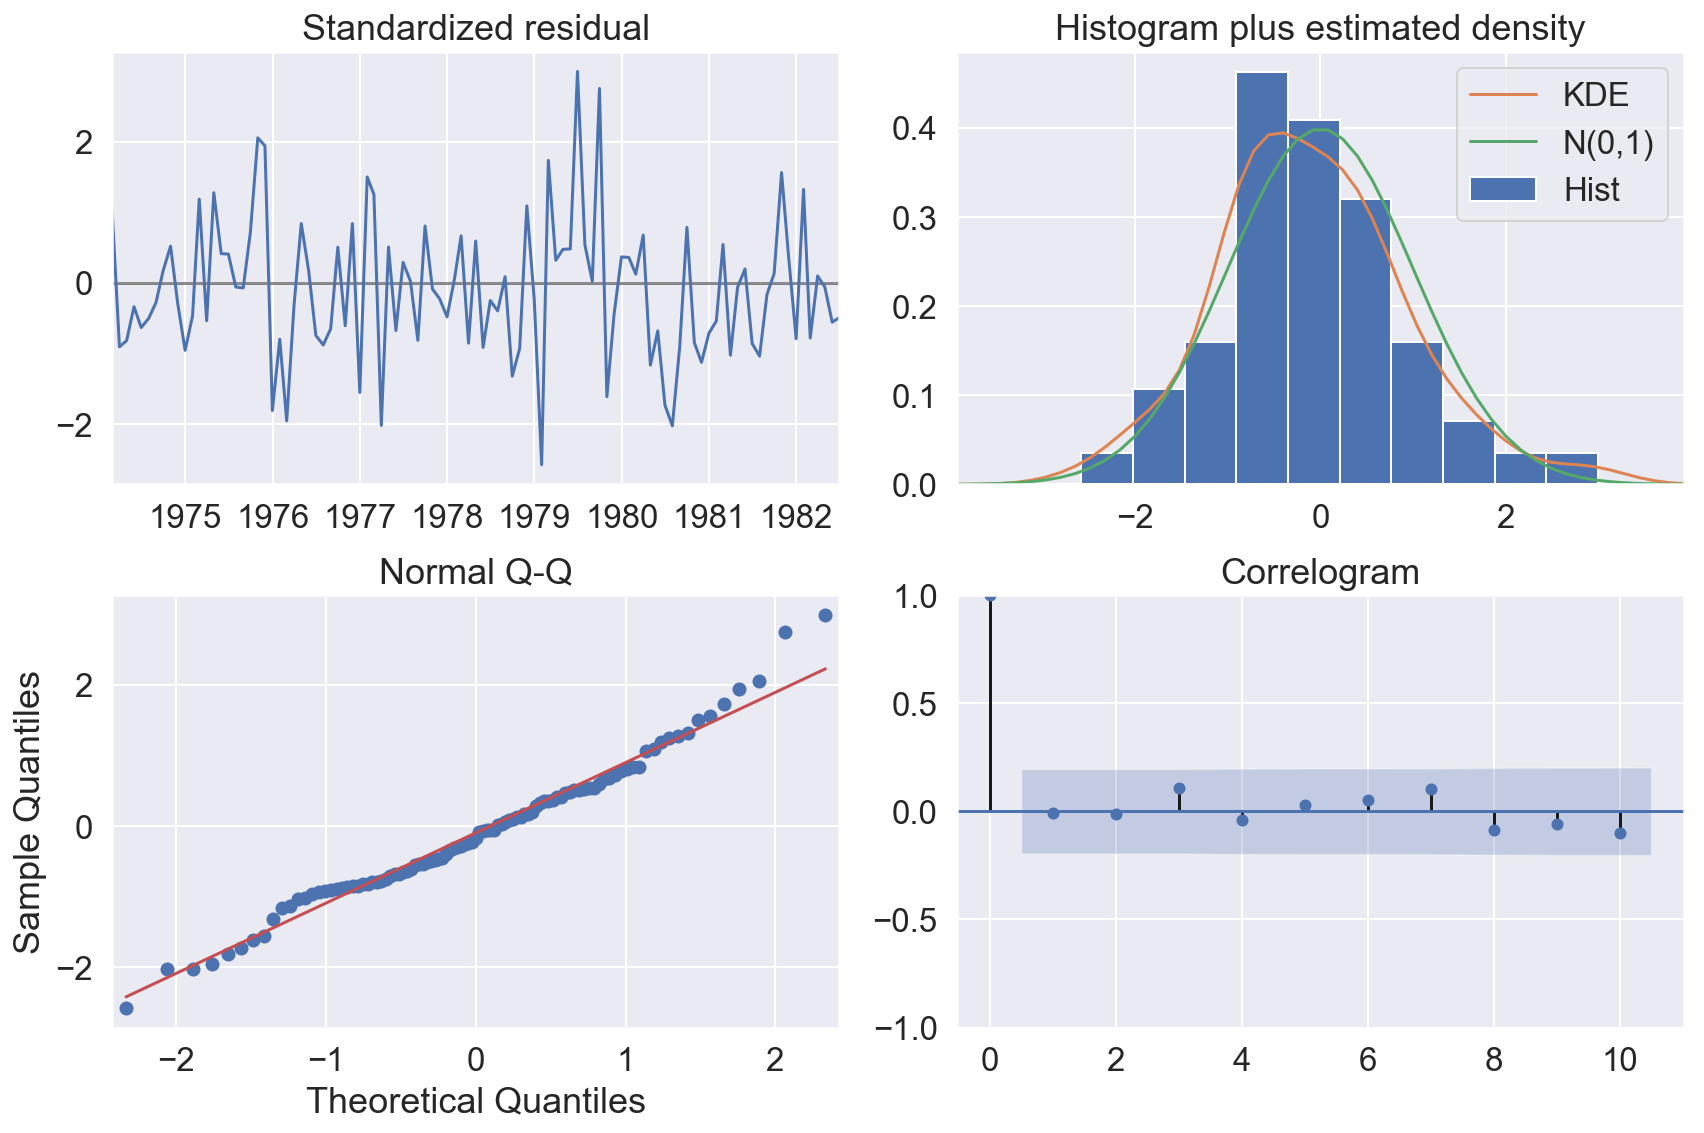

In [23]:
results.plot_diagnostics(figsize=(12, 8))
plt.tight_layout()
plt.show()

### Forecast using the SARIMAX model

Statsmodels result objects from SARIMAX have a `.forecast` function that can use the state space model to predict future timepoints.

Forecast additional timepoints and plot them.

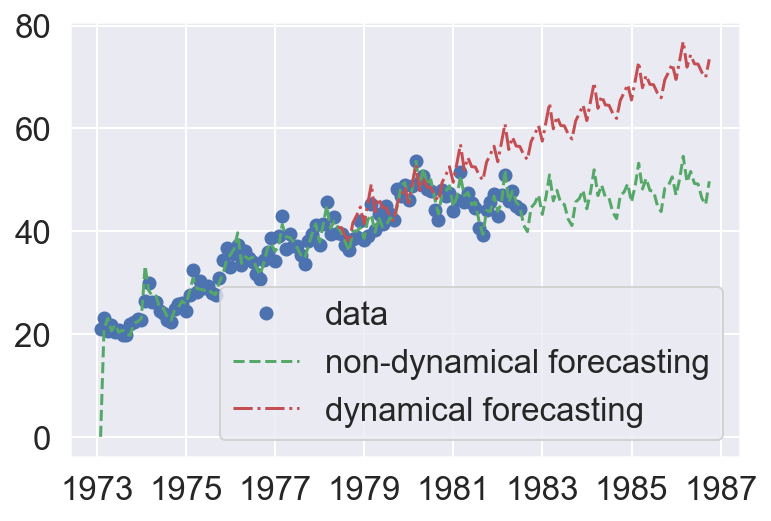

In [24]:
# forecasting
start_p = 50

# two equivalent ways for getting non-dynamical forecasts
# preds = results.forecast(50)
preds = results.predict(start=0, end=len(data)+50, dynamic=False)

preds_dyn = results.predict(start=len(data)-start_p,
                            end=len(data)+50, dynamic=True)
fcast = pd.concat([data, preds])
fcast_1 = pd.concat([data[:len(data)-start_p], preds_dyn])


plt.figure()
plt.plot(data, 'bo', preds, 'g--', preds_dyn, 'r-.')
plt.legend(['data', 'non-dynamical forecasting', 'dynamical forecasting'])
plt.show()

# cool thing about SARIMA is that it gives you proper values for the below prediction chart, not just plotting
# predicted diffs... so we would use SARIMA normally, not ARIMA due to convenience (you can just set the 
# seasonal order to (0, 0, 0, 0) ie. the default and just tune for that)

To evaluate the one-step ahead forecasts, it is better to discard the first few predictions as there are not yet values to predict those.

### Force coefficients to zero

Instead of simply indicating orders $p$ and $q$, we can pass for each parameter a list of binary values indicating which lag to include and which one to exclude. That is also very convenient for pure ARIMA models.

(In this case, this is not a model improvement.)

In [25]:
model = sm.tsa.statespace.SARIMAX(data,
                                  order=((0, 1, 0, 1), 1, (0, 1)), # e.g. ar (0,1,0,1) here means we drop ar 
                                  # terms at every other step, as you can see in table below
                                  seasonal_order=(1, 1, 1, 12))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                         Statespace Model Results                                         
==========================================================================================================
Dep. Variable:                                             riders   No. Observations:                  114
Model:             SARIMAX((2, 4), 1, (2,))x((12,), 1, (12,), 12)   Log Likelihood                -165.857
Date:                                            Fri, 14 Feb 2020   AIC                            343.713
Time:                                                    12:32:05   BIC                            359.404
Sample:                                                01-31-1973   HQIC                           350.065
                                                     - 06-30-1982                                         
Covariance Type:                                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L2         -0.8208      0.525     -1.562      0.118      -1.850       0.209
ar.L4         -0.0735      0.127     -0.578      0.563      -0.323       0.176
ma.L2          0.8053      0.548      1.469      0.142      -0.269       1.880
ar.S.L12       0.3121      0.252      1.240      0.215      -0.181       0.805
ma.S.L12      -0.7427      0.235     -3.161      0.002      -1.203      -0.282
sigma2         1.4892      0.205      7.261      0.000       1.087       1.891
===================================================================================
Ljung-Box (Q):                       34.76   Jarque-Bera (JB):                 3.86
Prob(Q):                              0.70   Prob(JB):                         0.15
Heteroskedasticity (H):               1.21   Skew:                             0.36
Prob(H) (two-sided):                  0.58   Kurtosis:                         3.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [26]:
model = sm.tsa.statespace.SARIMAX(data,
                                  order=(1, 1, 0)  # ,
                                  # seasonal_order=(1,0,1,12)
                                  )
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                 riders   No. Observations:                  114
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -276.469
Date:                Fri, 14 Feb 2020   AIC                            556.938
Time:                        12:32:05   BIC                            562.393
Sample:                    01-31-1973   HQIC                           559.151
                         - 06-30-1982                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3544      0.091     -3.905      0.000      -0.532      -0.177
sigma2         7.8005      1.253      6.225      0.000       5.344      10.257
===================================================================================
Ljung-Box (Q):                      327.66   Jarque-Bera (JB):                 4.75
Prob(Q):                              0.00   Prob(JB):                         0.09
Heteroskedasticity (H):               1.77   Skew:                             0.37
Prob(H) (two-sided):                  0.08   Kurtosis:                         2.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [27]:
results.mse

AttributeError: 'SARIMAXResults' object has no attribute 'mse'

In [28]:
model = sm.tsa.statespace.SARIMAX(data,
                                  order=(0, 0, 0),
                                  seasonal_order=(1, 1, 0, 12)
                                  )
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            Statespace Model Results                            
================================================================================
Dep. Variable:                   riders   No. Observations:                  114
Model:             SARIMAX(1, 1, 0, 12)   Log Likelihood                -289.788
Date:                  Fri, 14 Feb 2020   AIC                            583.577
Time:                          12:32:20   BIC                            588.827
Sample:                      01-31-1973   HQIC                           585.703
                           - 06-30-1982                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.2989      0.113      2.635      0.008       0.077       0.521
sigma2        17.0007      2.476      6.865      0.000      12.147      21.854
===================================================================================
Ljung-Box (Q):                      408.91   Jarque-Bera (JB):                 0.18
Prob(Q):                              0.00   Prob(JB):                         0.91
Heteroskedasticity (H):               1.35   Skew:                             0.04
Prob(H) (two-sided):                  0.39   Kurtosis:                         2.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Visualizing the time series
---

Now we have many different options for performing differencing. Having reached stationarity can be judged in similar ways as before by eye inspection. 


In [29]:
def rolling(timeseries, window=12, center=True, figsize=(12, 8)):
    '''
    Plot original timeseries, 
    rolling mean over given window size and rolling 
    mean plus/minus standard deviation
    '''

    rolmean = timeseries.rolling(window=window, center=center).mean()
    rolstd = timeseries.rolling(window=window, center=center).std()

    # Plot rolling statistics:
    fig = plt.figure(figsize=figsize)
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std_plus = plt.plot(rolmean+rolstd, color='red', ls='--',
                        label='Rolling Mean +/- Rolling Std')
    std_minus = plt.plot(rolmean-rolstd, color='red', ls='--', label='')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

def autocorrelation_plot(y, lags=20, alpha=0.05):
    """
    Plot autocorrelations and partial autocorrelations
    Arguments:
    y: Time series
    lags: Number of lags to plot
    alpha: Confidence level for random noise
    """

    se = stats.norm().ppf(1-alpha/2)/np.sqrt(len(y))

    fig, ax = plt.subplots(ncols=2, figsize=(12, 4), sharey=True)

    plot_acf(y, lags=lags, alpha=alpha, ax=ax[0])
    ax[0].hlines(np.array([-1, 1])*se, 1, lags, linestyles='--', lw=1)

    plot_pacf(y, lags=lags, alpha=alpha, ax=ax[1], method='ywmle')
    ax[1].hlines(np.array([-1, 1])*se, 1, lags, linestyles='--', lw=1)
    plt.show()

def test_and_vis(timeseries):
    '''
    plot timeseries with rolling mean and autocorrelations
    '''
    rolling(timeseries)
    autocorrelation_plot(timeseries.dropna())

### Visualize the original timeseries

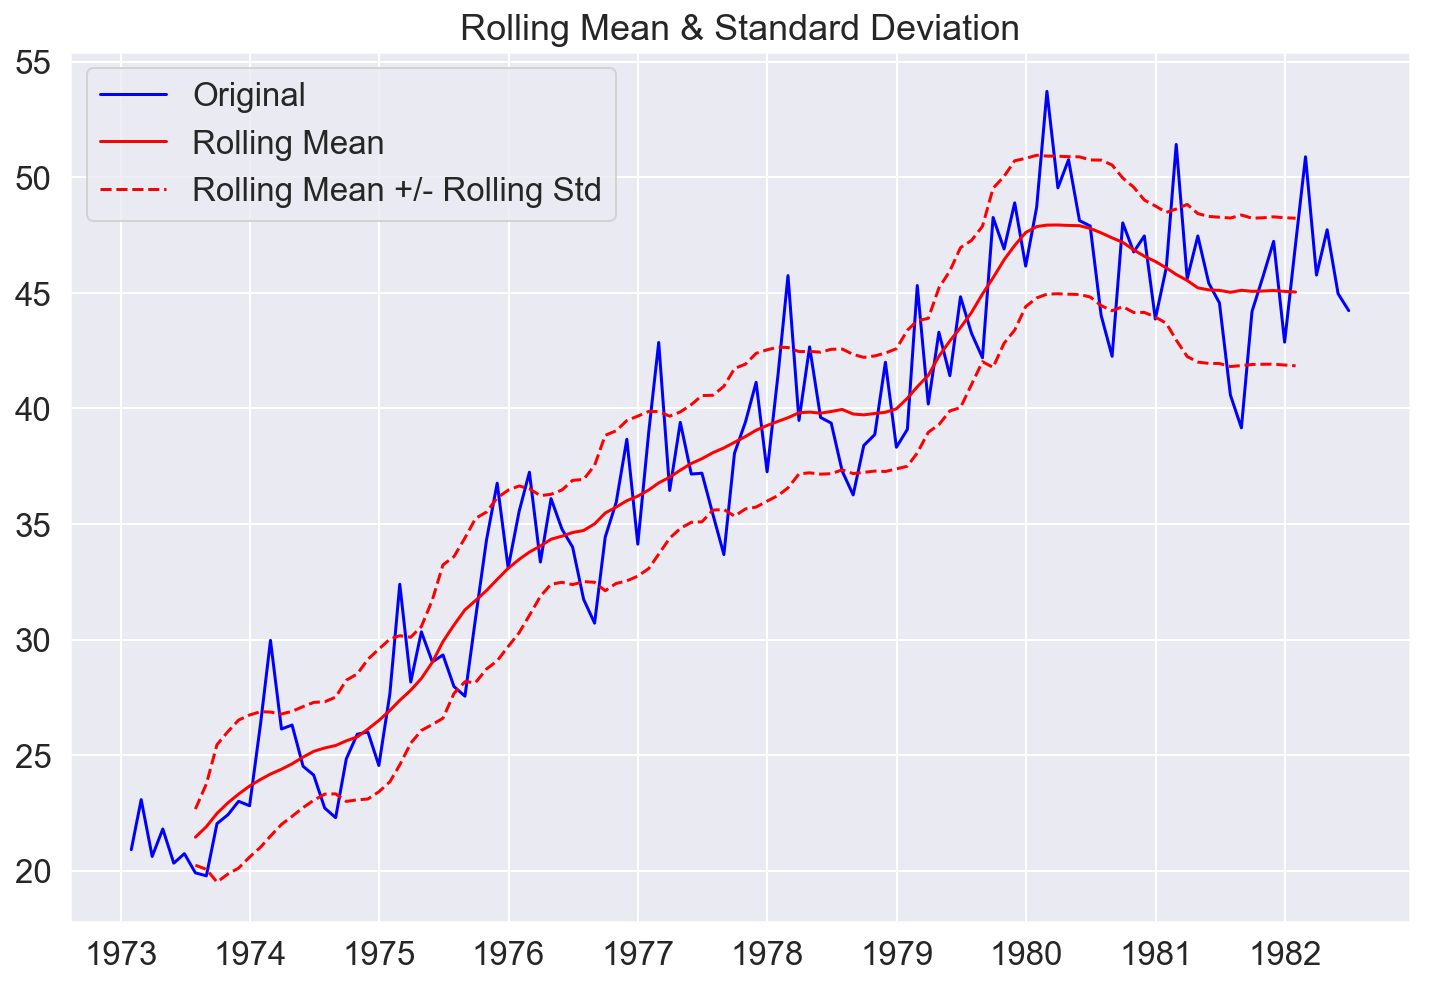

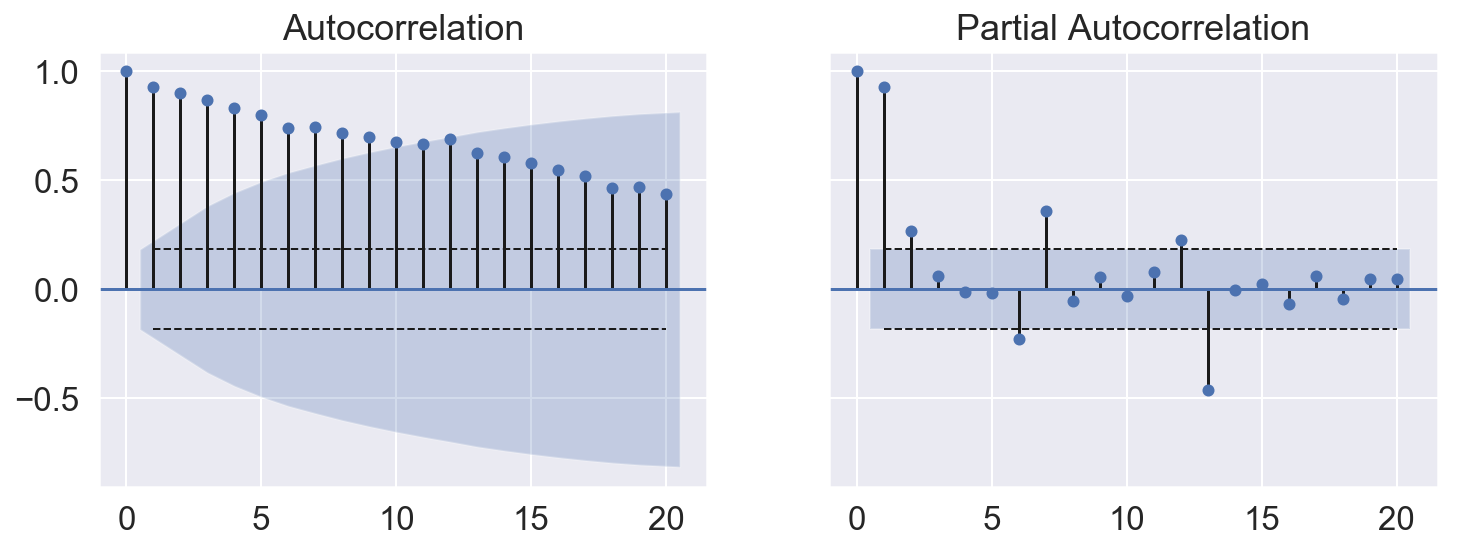

In [30]:
test_and_vis(bus.riders)

### Visualize the first-differenced timeseries

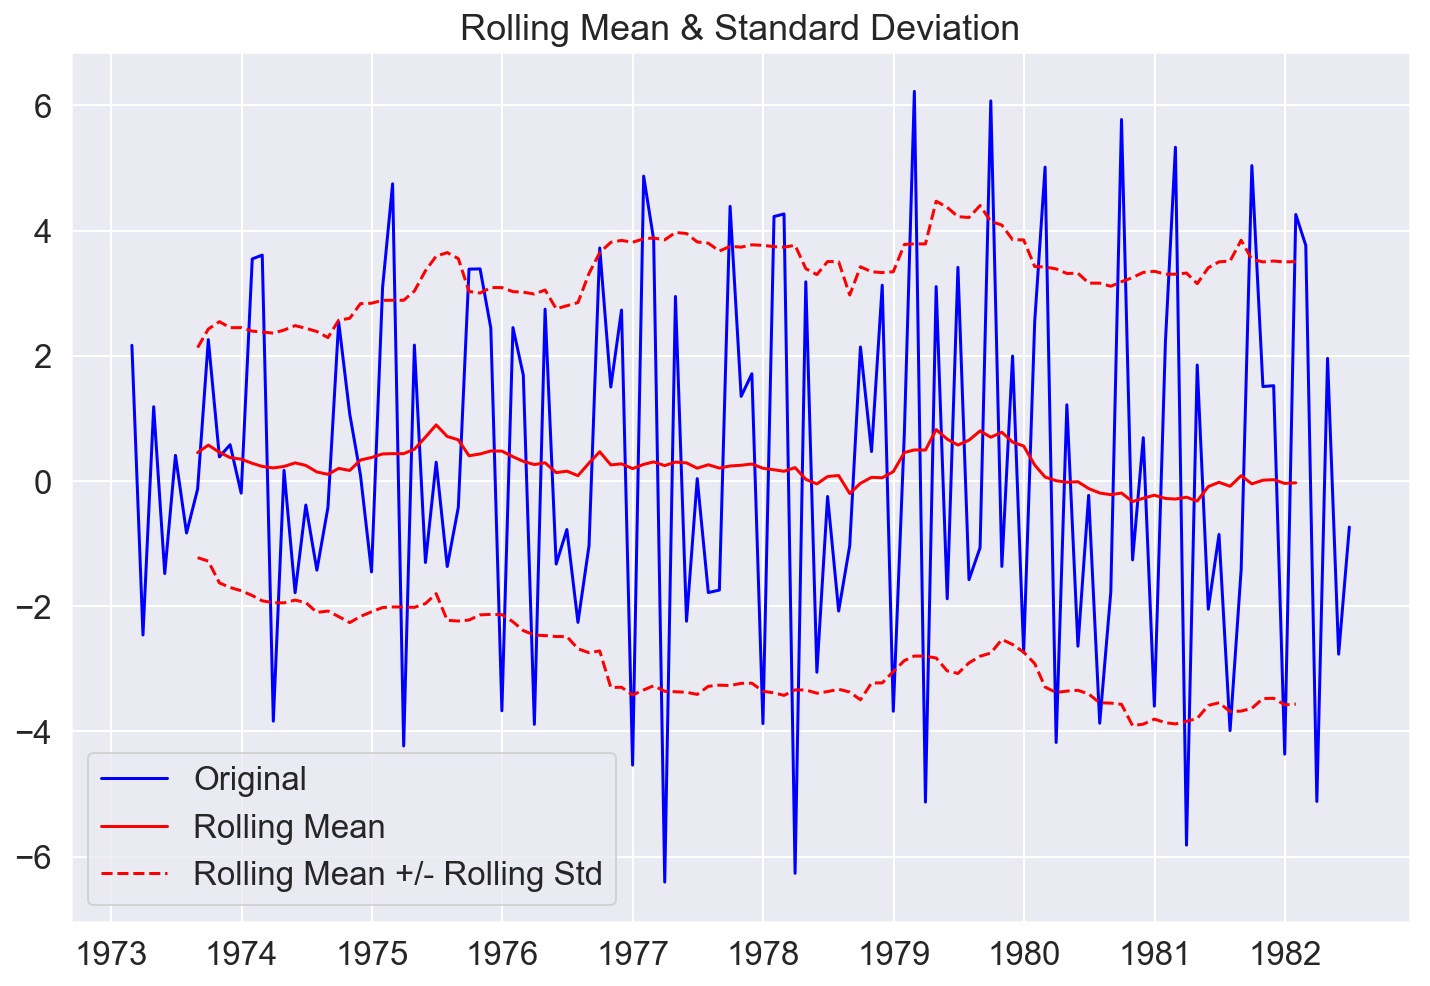

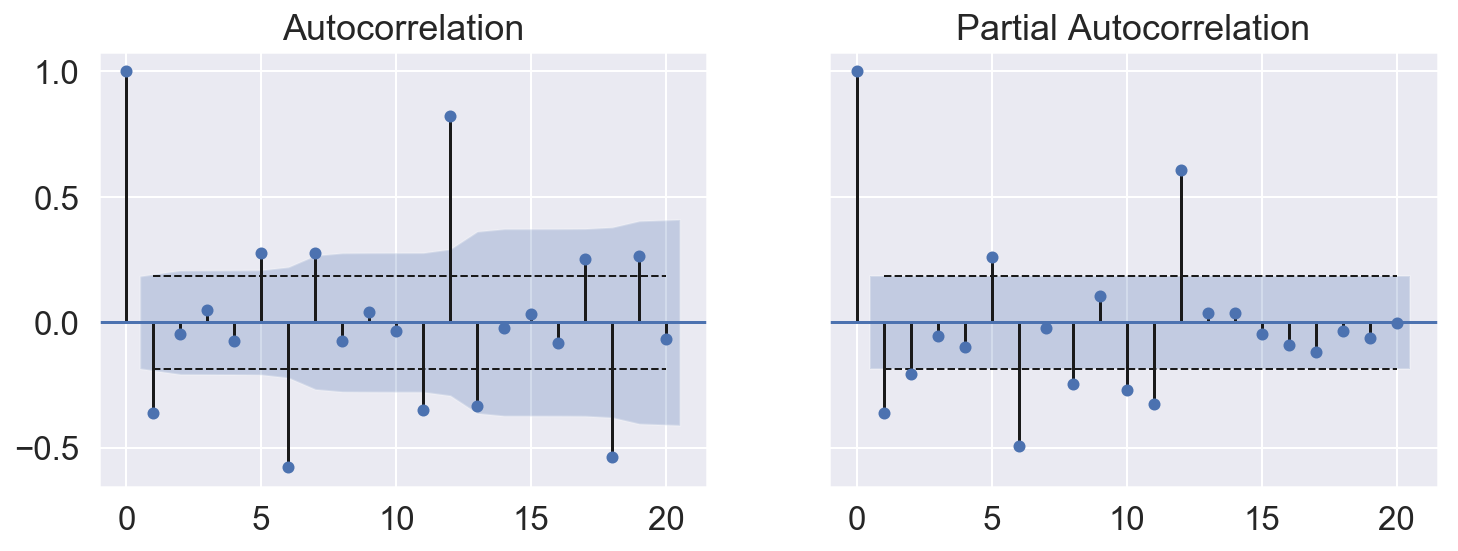

In [31]:
test_and_vis(bus.first_difference)

### Visualize the second-differenced timeseries

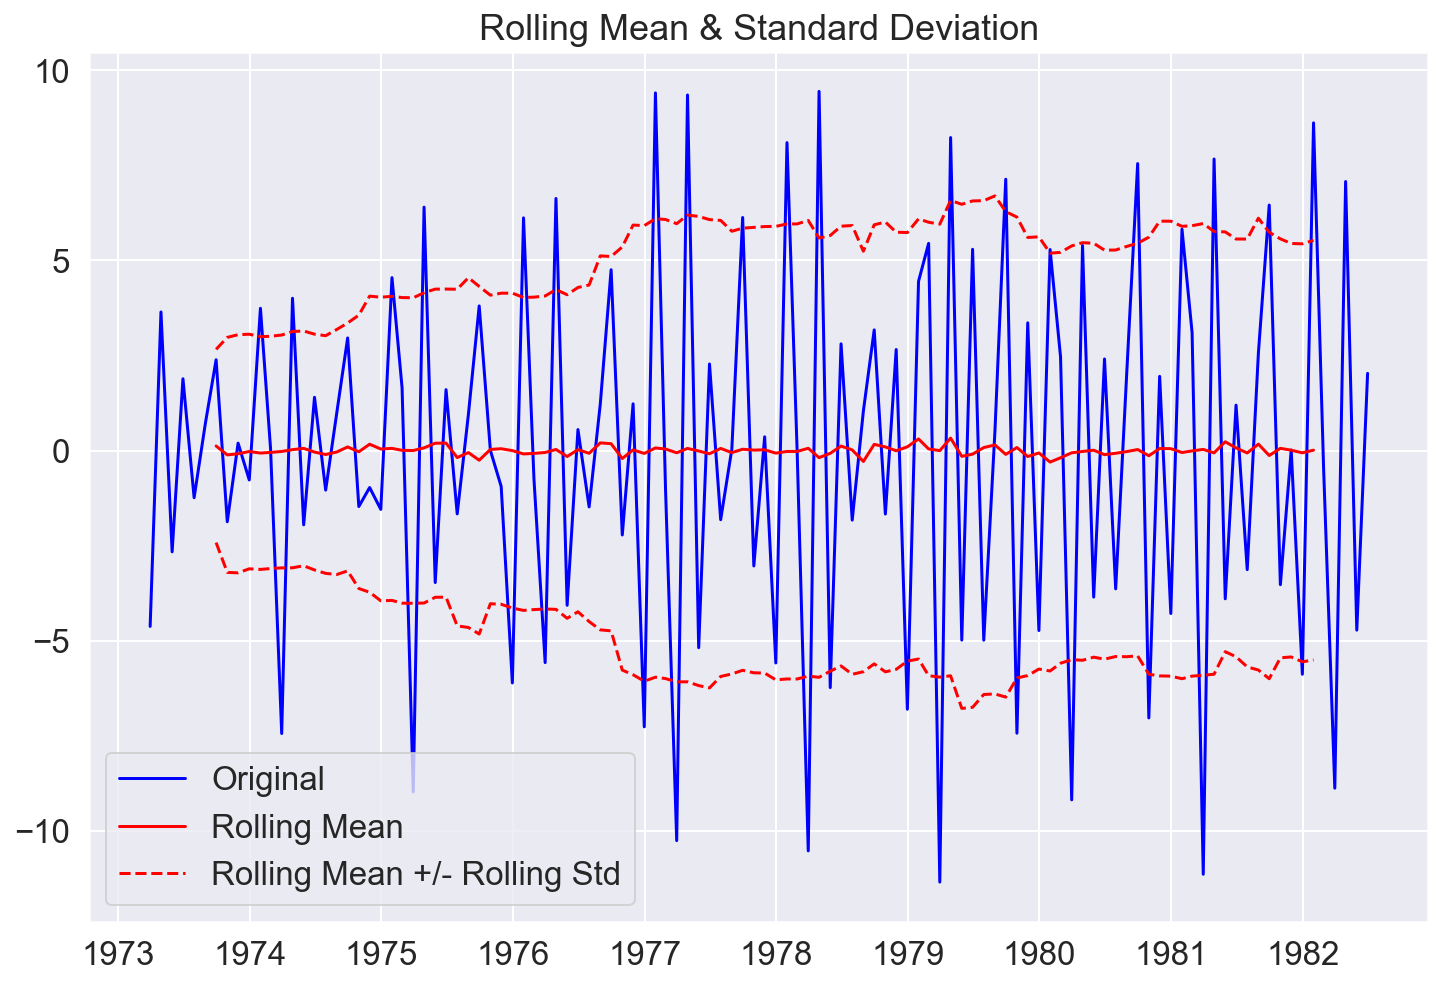

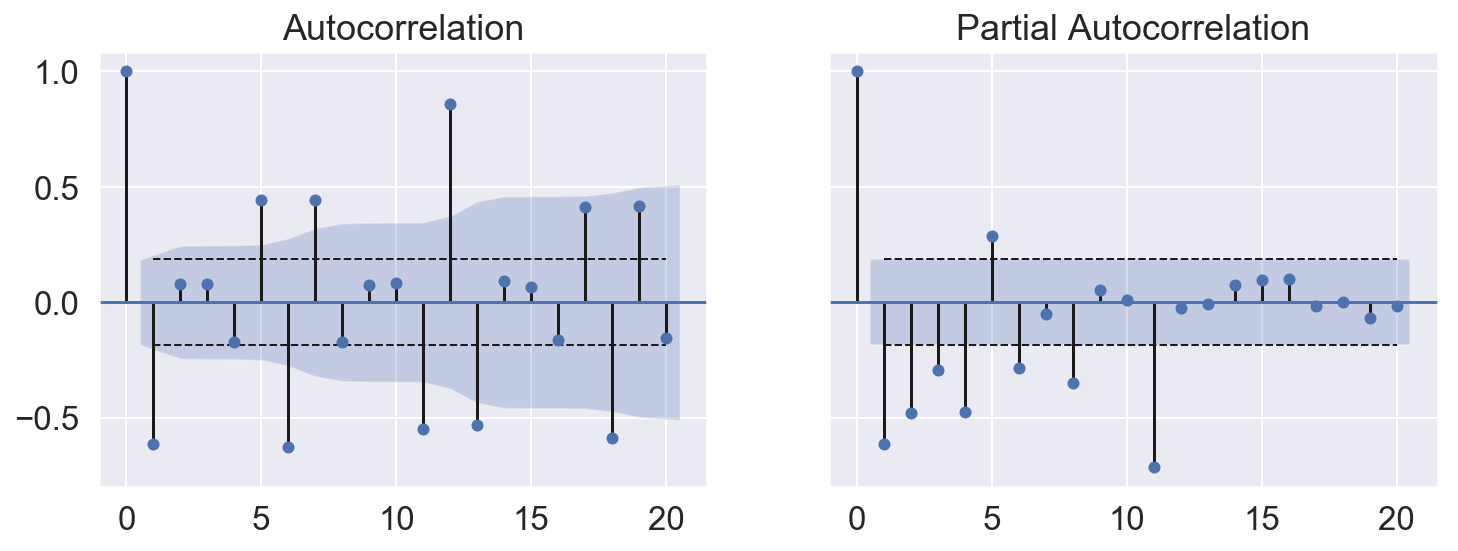

In [32]:
test_and_vis(bus.second_difference)

### Visualize *seasonally*-differenced timeseries

Where the season will be a year's difference (12 months).

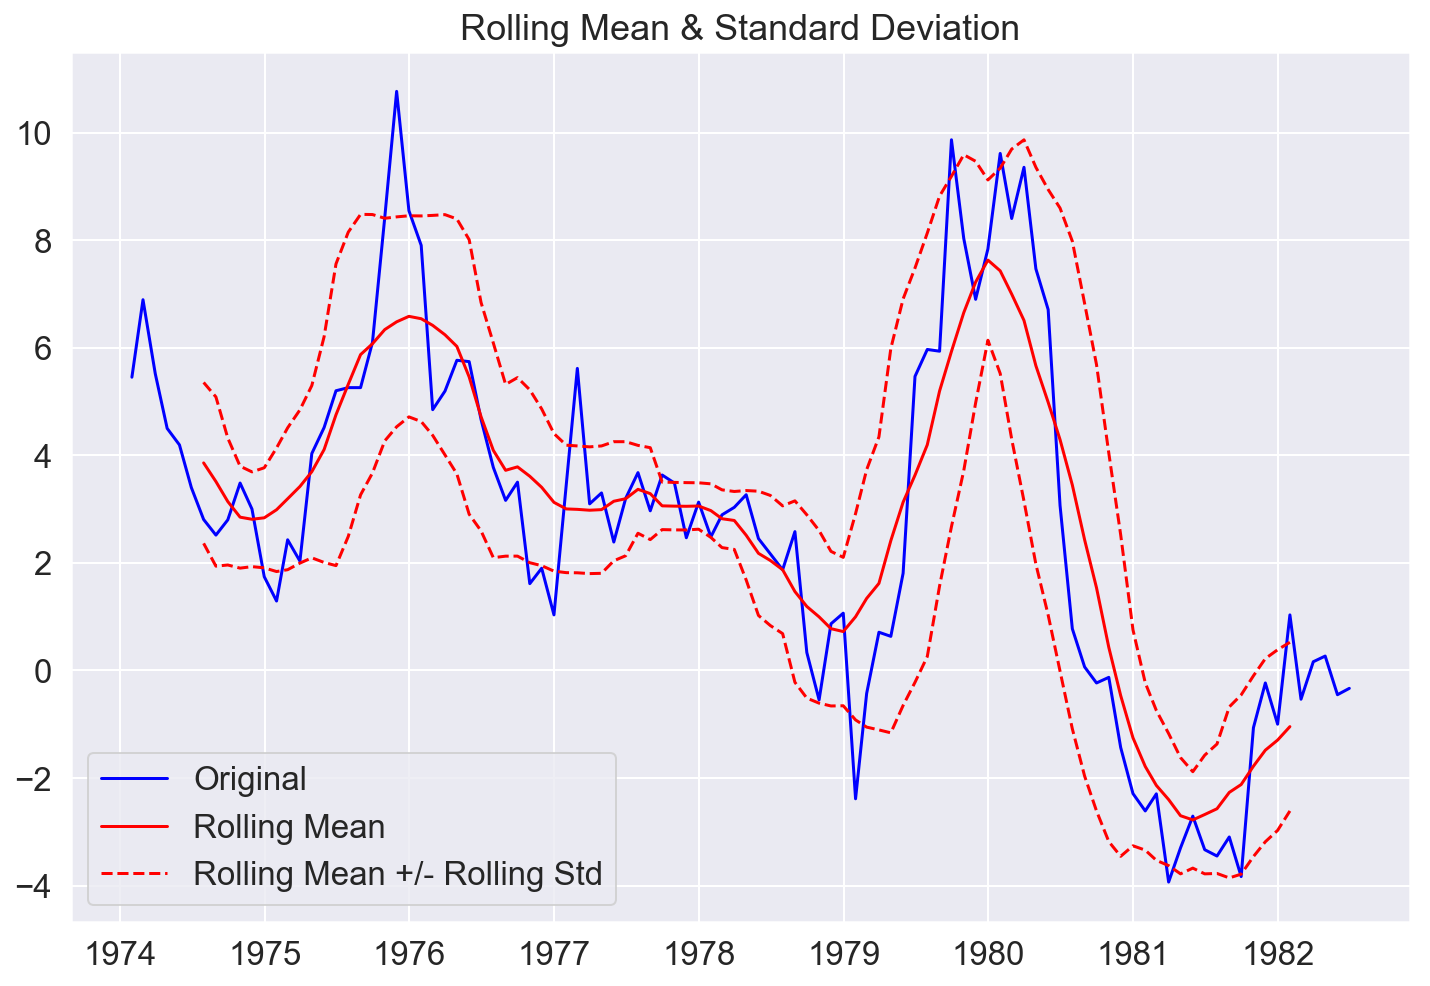

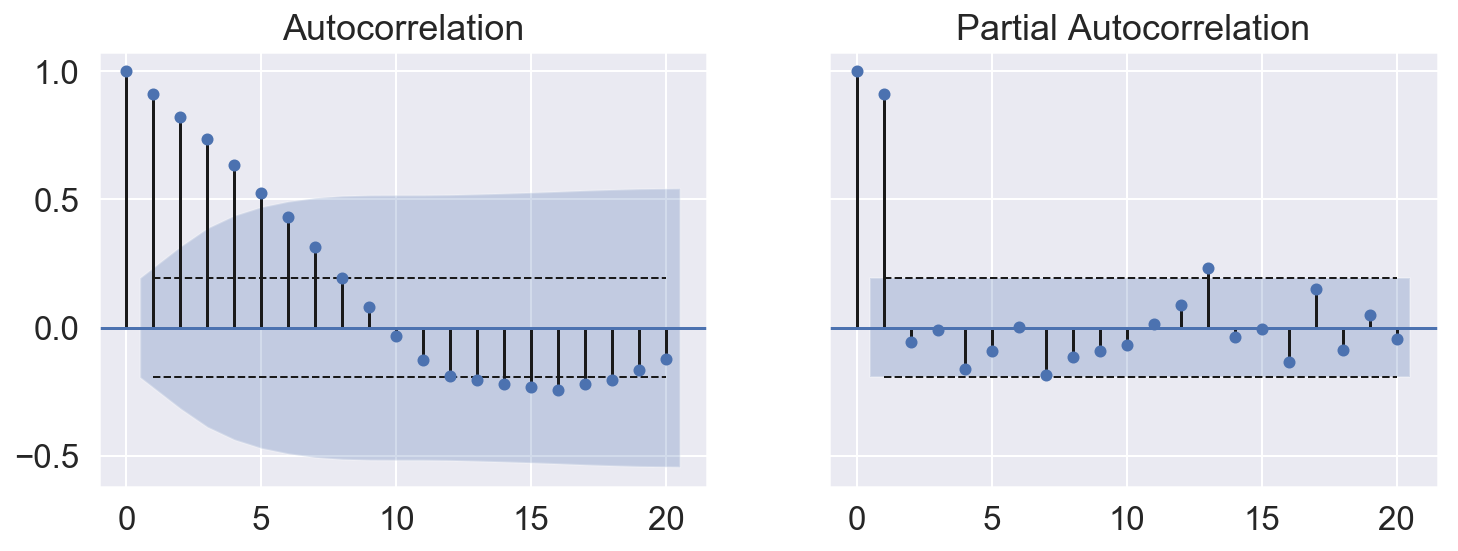

In [33]:
test_and_vis(bus.seasonal_difference)

### Visualize the first differenced seasonally differenced timeseries


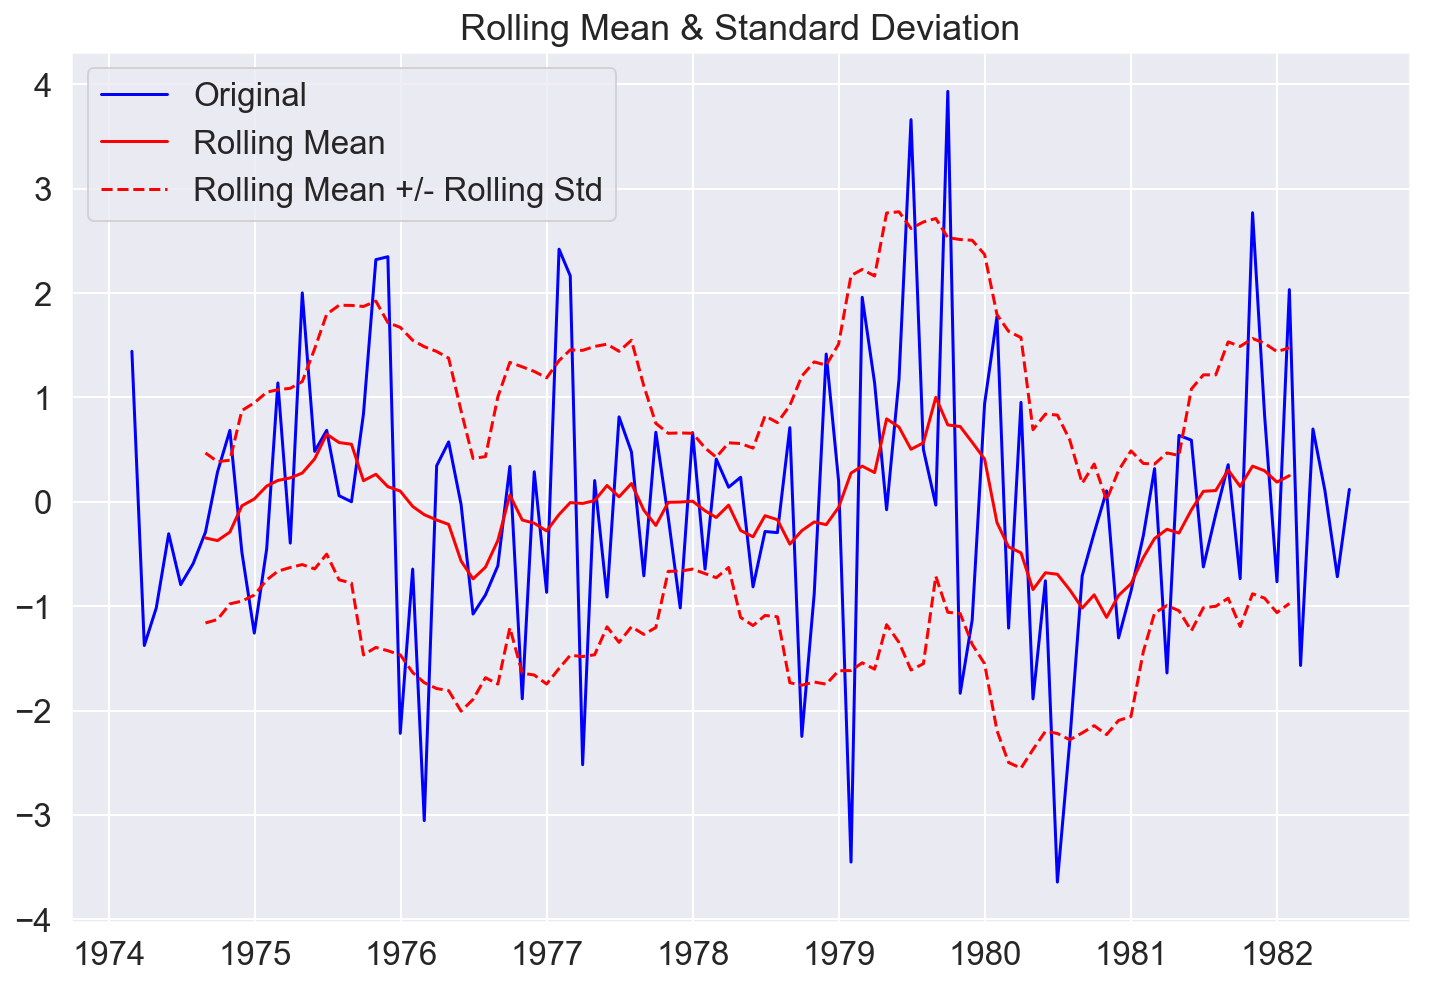

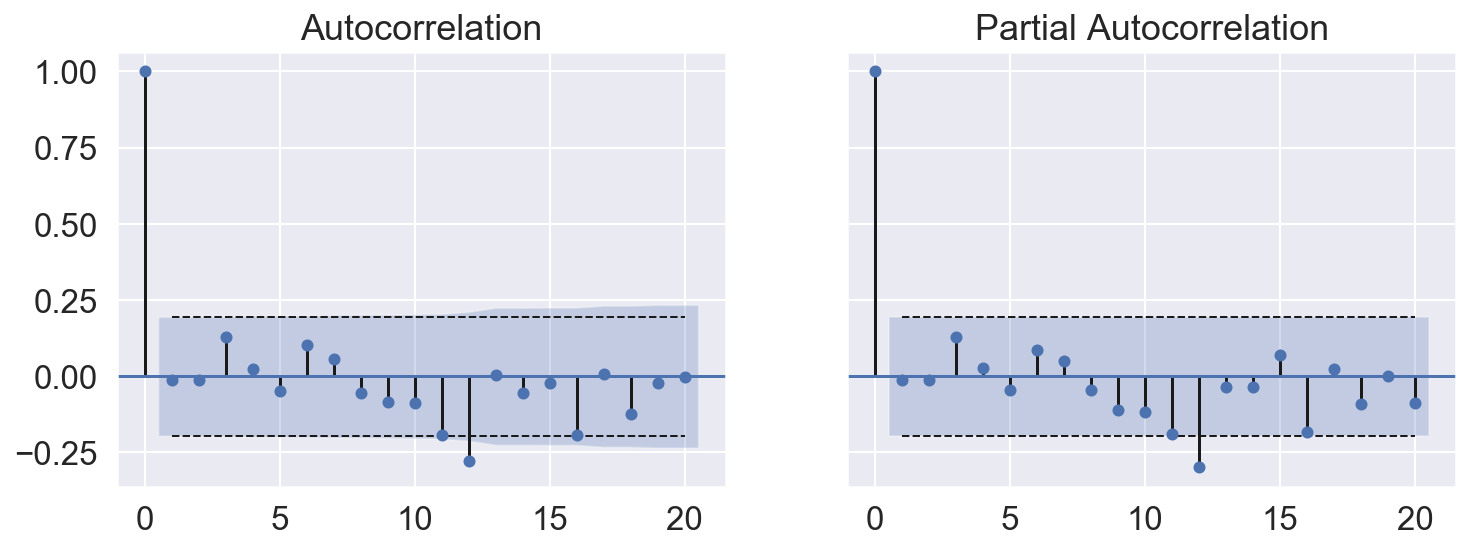

In [34]:
# first seasonal difference
test_and_vis(bus.seasonal_first_difference)

### Visualize the second differenced seasonally differenced timeseries

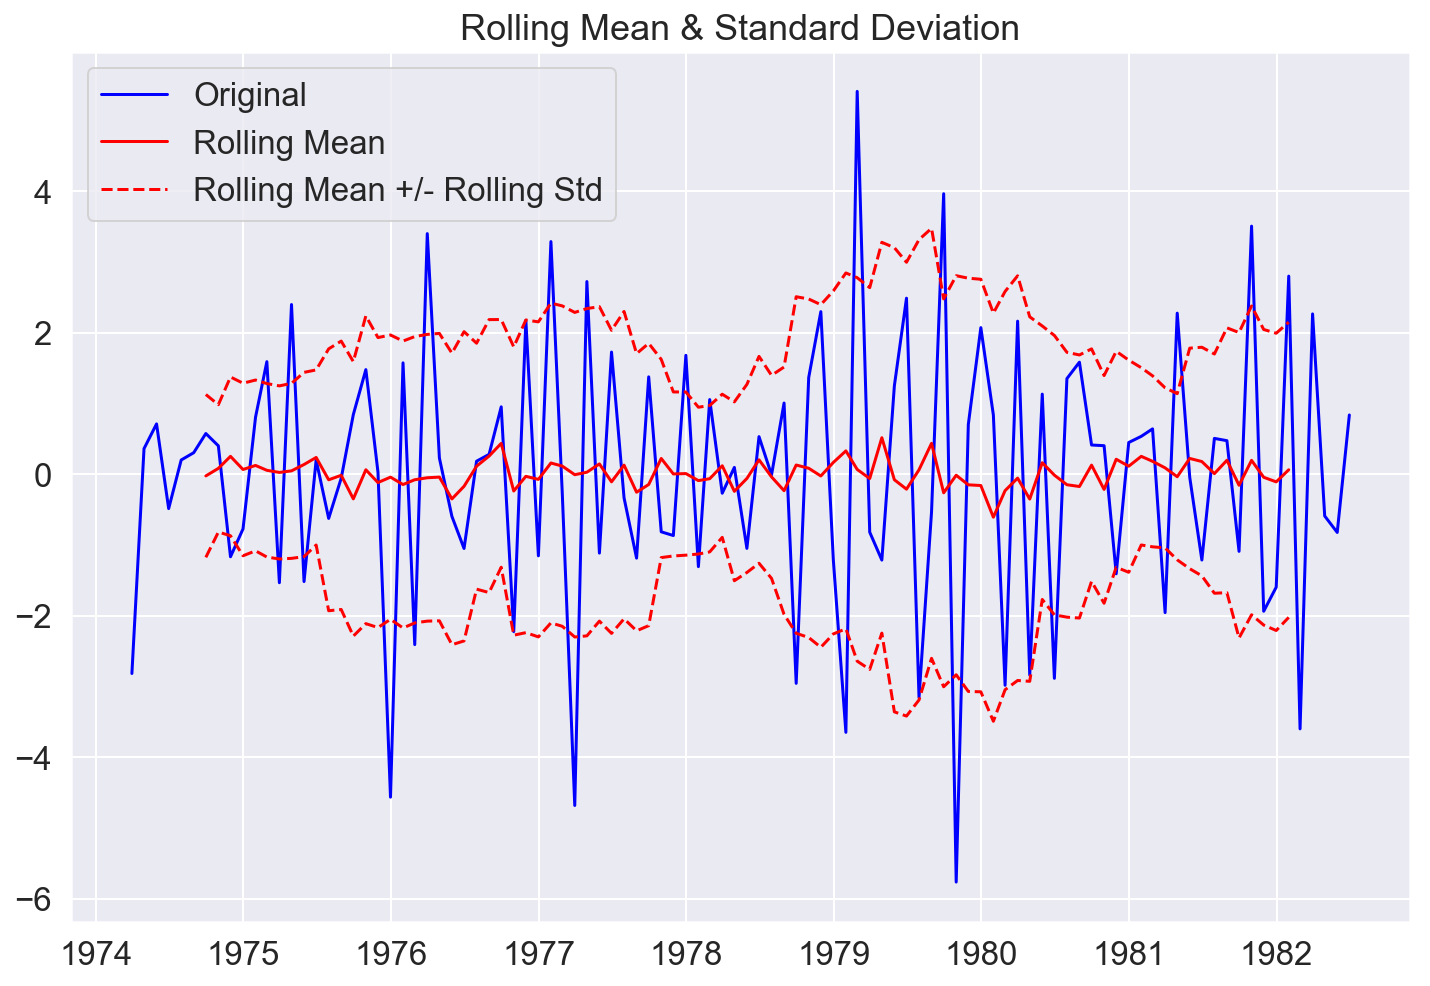

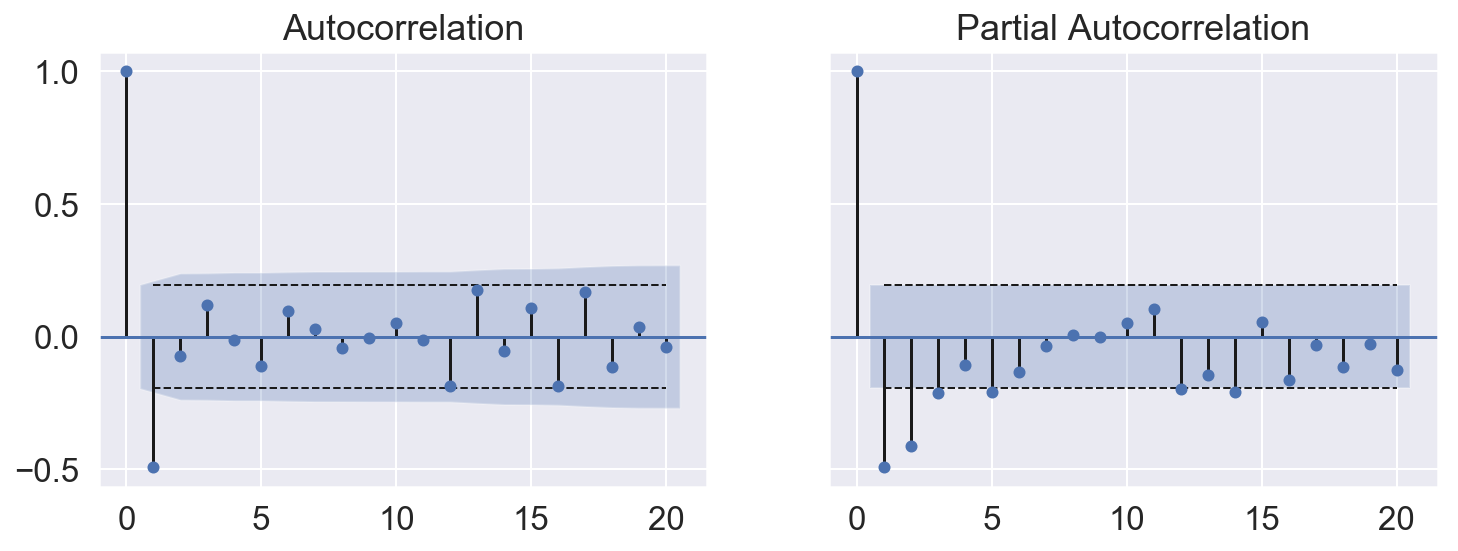

In [35]:
test_and_vis(bus.seasonal_second_difference)

## Load additional data
Can I use additional predictors, in addition to the uniavariate timeseries analysis to improve predictions?

In [36]:
X = pd.read_csv('../../../../resource-datasets/portland_bus_riders/precipitations.csv')
X.head(2)

,YR,MO,total_precip
0,1973,1,3.69
1,1973,2,1.94


In [37]:
X.tail(2)

,YR,MO,total_precip
112,1982,5,0.46
113,1982,6,1.66


In [38]:
X.index = pd.date_range(start='01/01/1973', end='30/06/1982', freq='M')

In [39]:
X.head()

,YR,MO,total_precip
1973-01-31,1973,1,3.69
1973-02-28,1973,2,1.94
1973-03-31,1973,3,2.45
1973-04-30,1973,4,1.33
1973-05-31,1973,5,1.43


In [40]:
X['dayly_precip'] = X.total_precip / X.index.map(lambda x: pd.Period(x, freq='M').daysinmonth)

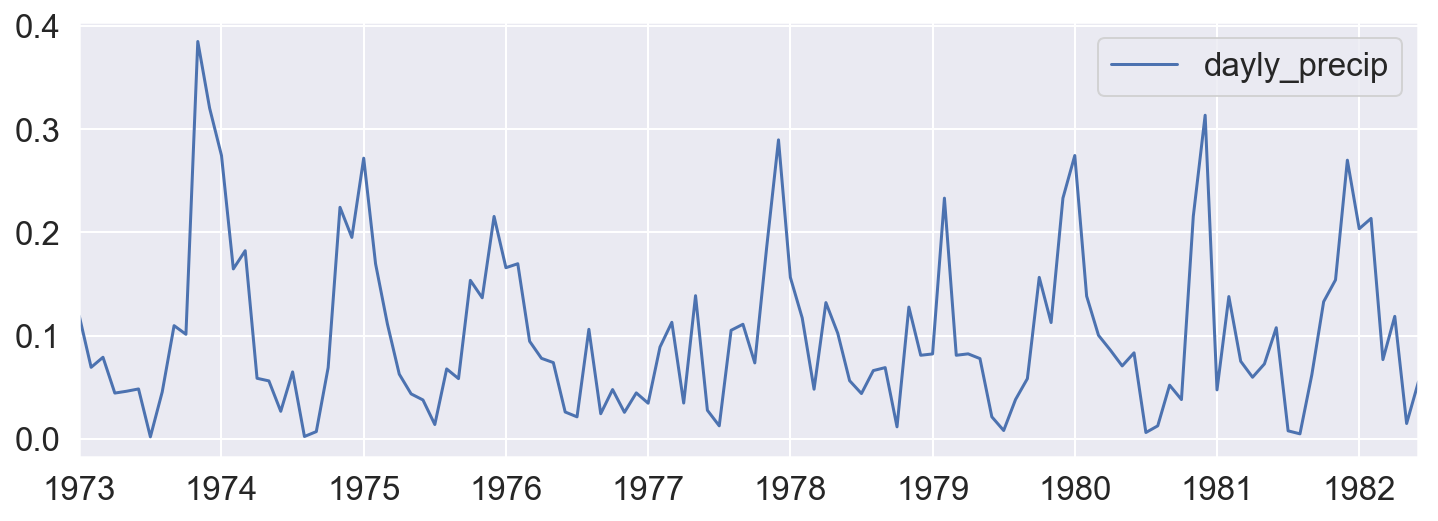

In [41]:
X[['dayly_precip']].plot(figsize=(12, 4))
plt.show()

In [42]:
data = bus.riders
model = sm.tsa.statespace.SARIMAX(endog=data,
                                  exog=X[['dayly_precip']],
                                  order=(1, 2, 1),
                                  seasonal_order=(1, 1, 1, 12))
results = model.fit(maxiter=10000)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                             riders   No. Observations:                  114
Model:             SARIMAX(1, 2, 1)x(1, 1, 1, 12)   Log Likelihood                -167.235
Date:                            Fri, 14 Feb 2020   AIC                            346.470
Time:                                    12:32:33   BIC                            362.102
Sample:                                01-31-1973   HQIC                           352.797
                                     - 06-30-1982                                         
Covariance Type:                              opg                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
dayly_precip    -0.0454      1.590     -0.029      0.977      -3.162       3.071
ar.L1           -0.1028      0.108     -0.954      0.340      -0.314       0.108
ma.L1           -0.9990      1.945     -0.514      0.607      -4.811       2.813
ar.S.L12         0.2982      0.234      1.276      0.202      -0.160       0.756
ma.S.L12        -0.7734      0.256     -3.025      0.002      -1.275      -0.272
sigma2           1.4759      2.795      0.528      0.597      -4.002       6.954
===================================================================================
Ljung-Box (Q):                       37.78   Jarque-Bera (JB):                 2.36
Prob(Q):                              0.57   Prob(JB):                         0.31
Heteroskedasticity (H):               0.88   Skew:                             0.27
Prob(H) (two-sided):                  0.71   Kurtosis:                         3.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [43]:
# Forecasting beyond the end of the time series requires passing predictor values, for in-sample forecasts
# the existing values are used
results.predict(start=110, end=len(data)+5-1, dynamic=True, exog=X[['dayly_precip']].values[0:5, :])

1982-03-31    45.559377
1982-04-30    47.416485
1982-05-31    45.195739
1982-06-30    44.838799
1982-07-31    41.559277
1982-08-31    40.140757
1982-09-30    44.665522
1982-10-31    45.414068
1982-11-30    46.870000
Freq: M, dtype: float64

In [46]:
data.head()

1973-01-31    20.903226
1973-02-28    23.071429
1973-03-31    20.612903
1973-04-30    21.800000
1973-05-31    20.322581
Freq: M, Name: riders, dtype: float64

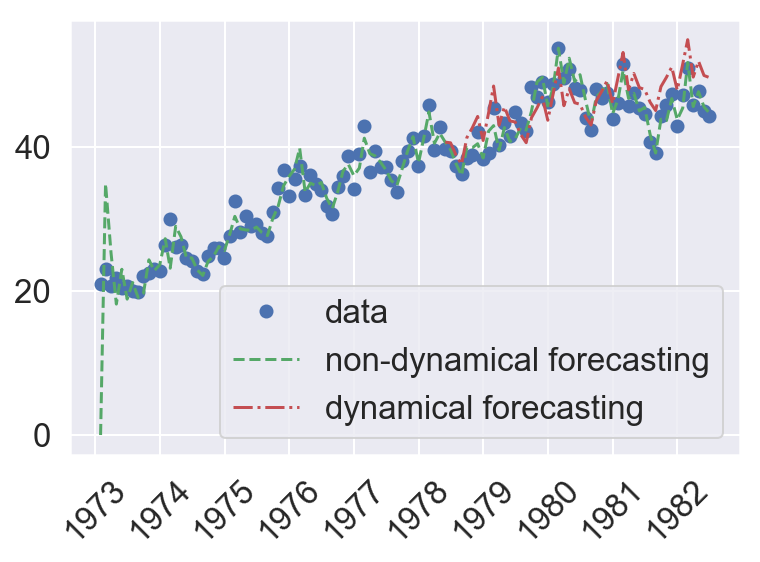

In [48]:
# forecasting
start_p = 50

preds = results.predict(start=0, end=len(data)-1, dynamic=False)
preds_dyn = results.predict(start=len(data)-start_p,
                            end=len(data)-1, dynamic=True)
fcast = pd.concat([data, preds])
fcast_1 = pd.concat([data[:len(data)-1-start_p], preds_dyn])


plt.figure()
plt.plot(data, 'bo', preds, 'g--', preds_dyn, 'r-.')
plt.xticks(rotation=45)
plt.legend(['data', 'non-dynamical forecasting', 'dynamical forecasting'])
plt.show()

<a id='additional-resources'></a>
## Additional resources
---


+ A Seasonal ARIMA [code-along](http://www.statsmodels.org/dev/examples/notebooks/generated/statespace_sarimax_stata.html) from statsmodels
+ An excellent [blog code-along](http://www.seanabu.com/2016/03/22/time-series-seasonal-ARIMA-model-in-python/) to Seasonal ARIMA + [iPython noteback](https://github.com/seanabu/seanabu.github.io/blob/master/Seasonal_ARIMA_model_Portland_transit.ipynb)
+ Duke's breakdown of [ACF and PACF](http://people.duke.edu/~rnau/411arim3.htm)
+ Duke's breakdown of available [stationarity transformations](http://people.duke.edu/~rnau/whatuse.htm)
+ A 35min [video econometric](https://www.youtube.com/watch?v=Y2khrpVo6qI) breakdown of ARIMA
+ [Wikipedia Dickey-Fuller](https://en.wikipedia.org/wiki/Dickey%E2%80%93Fuller_test)
+ Stats Exchange breakdown of [Augmented Dickey-Fuller](http://stats.stackexchange.com/questions/44647/which-dickey-fuller-test-should-i-apply-to-a-time-series-with-an-underlying-mode)
+ A walk-through of selecting pdq from [Duke](http://people.duke.edu/~rnau/411arim.htm)
+ Big data analytics with ARIMA [case study](http://sda-pakdd2014.weebly.com/uploads/2/4/0/8/24088081/7w12.pdf)
+ BONUS! Checkout [Granger Causality tests](https://en.wikipedia.org/wiki/Granger_causality)
